In [18]:
import numpy as np
from datetime import time, datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
workout_a = pd.read_csv('processed_data/workout_A.csv')

In [5]:
averages = workout_a.groupby(['workout_date']).split_in_s.mean()
workout_a = pd.merge(workout_a, averages, how='outer', on='workout_date')
workout_a = workout_a.rename(columns={'split_in_s_y': 'average_split', 'split_in_s_x':'split_in_s'})

In [23]:
print('You recorded your fastest average split for this workout on '+workout_a.loc[workout_a['average_split'].idxmin()]['workout_date'][:10]+'. The average split was '+str(timedelta(seconds=workout_a.average_split.min()))[3:10]+'.')

You recorded your fastest average split for this workout on 2022-07-18. The average split was 2:24.82.


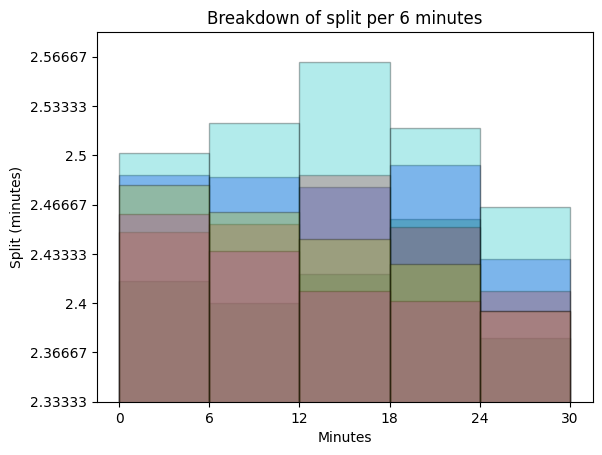

In [24]:
# fig, ax = plt.subplots()

# colour = ['g', 'b', 'r','c','m','y']

# for i,j in zip(workout_a.workout_date.unique(),colour):
#     msk = (workout_a['workout_date']==i)
#     ax.bar(workout_a[msk]['cutoff_minute'], workout_a[msk]['split_in_s'], color = j,width=-6,edgecolor='black', align='edge', alpha=0.3)

# scale_y = 60
# ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
# ax.yaxis.set_major_formatter(ticks_y)
# ax.set_ylim([140, 155])
# ax.xaxis.set_major_locator(MultipleLocator(6))

# ax.set(xlabel="Minutes",
#        ylabel="Split (minutes)",
#        title="Breakdown of split per 6 minutes")

# plt.show()

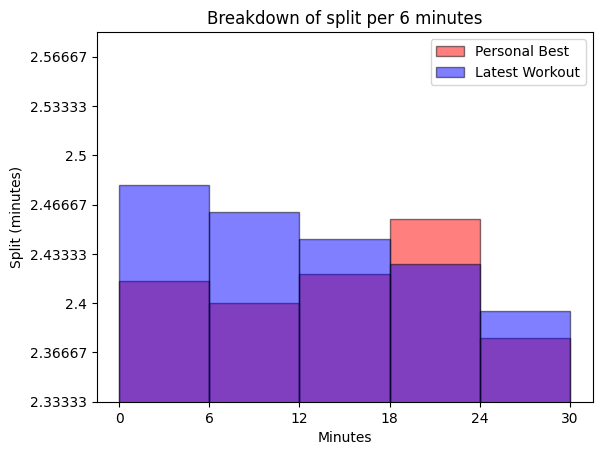

In [31]:
fig, az = plt.subplots()

min_split_mask = (workout_a['average_split']==workout_a.average_split.min())
latest_workout_mask = (workout_a['workout_date']==workout_a.workout_date.max())

pb = az.bar(
    workout_a[min_split_mask]['cutoff_minute'],
    workout_a[min_split_mask]['split_in_s'],
    color = 'r',width=-6,
    edgecolor='black',
    align='edge',
    alpha=0.5,
    label='Personal Best')

latest = az.bar(
    workout_a[latest_workout_mask]['cutoff_minute'],
    workout_a[latest_workout_mask]['split_in_s'],
    color = 'b',
    width=-6,
    edgecolor='black',
    align='edge',
    alpha=0.5,
    label='Latest Workout')

scale_y = 60
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
az.yaxis.set_major_formatter(ticks_y)
az.set_ylim([140, 155])
az.xaxis.set_major_locator(MultipleLocator(6))

az.set(xlabel="Minutes",
       ylabel="Split (minutes)",
       title="Breakdown of split per 6 minutes")
ax.legend(handles=[pb, latest])
plt.legend()
plt.show()

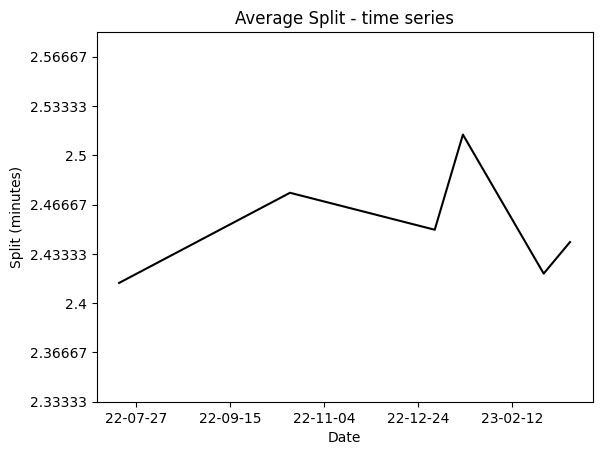

In [27]:
fig, ay = plt.subplots()

xs = matplotlib.dates.date2num(averages.index.to_list())
ay.plot(xs, averages.values, color='k')

scale_y = 60
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ay.yaxis.set_major_formatter(ticks_y)
ay.set_ylim([140, 155])

date_form = DateFormatter("%y-%m-%d")
ay.xaxis.set_major_formatter(date_form)

ay.set(xlabel="Date",
       ylabel="Split (minutes)",
       title="Average Split - time series")

plt.show()

In [10]:
avg_df = pd.DataFrame(averages)
avg_df

,split_in_s
workout_date,
2022-07-18 00:00:00+01:00,144.82
2022-10-17 00:00:00+01:00,148.48
2023-01-02 00:00:00+00:00,146.98
2023-01-17 00:00:00+00:00,150.84
2023-03-01 00:00:00+00:00,145.20
2023-03-15 00:00:00+00:00,146.48


In [12]:
averages.index.to_list()

['2022-07-18 00:00:00+01:00',
 '2022-10-17 00:00:00+01:00',
 '2023-01-02 00:00:00+00:00',
 '2023-01-17 00:00:00+00:00',
 '2023-03-01 00:00:00+00:00',
 '2023-03-15 00:00:00+00:00']